In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
def get_data():
    train_df = np.genfromtxt("/home/oleksandr/ML/lab_1_train.csv", delimiter=",")
    test_df = np.genfromtxt("/home/oleksandr/ML/lab_1_test.csv", delimiter=",")
    return train_df[1:,1], train_df[1:,2], test_df[1:,1], test_df[1:,2]

In [63]:
train_x, train_y, test_x, test_y = get_data()

In [64]:
def data_visualization(train_x, train_y, test_x, test_y):
    plt.figure(figsize=(4, 3))
    plt.scatter(train_x, train_y)
    plt.title("Training set")
    plt.xlabel("Length")
    plt.ylabel("Width")
    #plt.show()

    plt.figure(figsize=(4, 3))
    plt.scatter(test_x, test_y)
    plt.title("Test set")
    plt.xlabel("Length")
    plt.ylabel("Width")
    #plt.show()

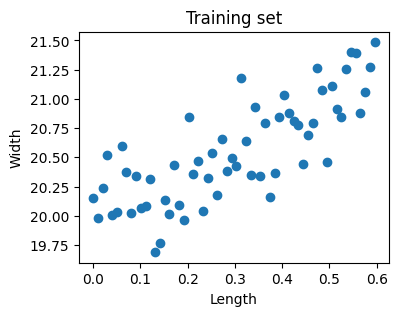

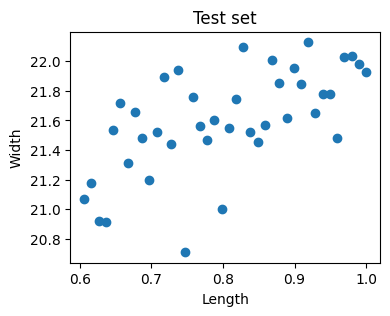

In [65]:
data_visualization(train_x, train_y, test_x, test_y)

In [66]:
def initialize_with_zeros():
    theta = 0
    b = 0
    return theta, b

In [67]:
def propagate(theta, b, X, Y):    
    m = X.shape[0]
  
    H = b + np.dot(theta, X)
    cost = (1/m)*np.sum((H-Y)**2)
  
    dt = (1/m)*np.dot(X, (H-Y).T)
    db = (1/m)*np.sum(H-Y)
    cost = np.squeeze(cost)
  
    grads = {"dt": dt,
             "db": db}
    
    return grads, cost

In [68]:
def optimize(theta, b, X, Y, num_iterations, learning_rate):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(theta, b, X, Y)

        dt = grads["dt"]
        db = grads["db"]
        
        theta = theta - learning_rate*dt
        b = b - learning_rate*db
        costs.append(cost)
        print(f"After iteration {i} cost={cost}, theta={theta}, b={b}")

    params = {"theta": theta,
              "b": b}
    
    grads = {"dt": dt,
             "db": db}
    
    return params, grads, costs

In [69]:
def predict(theta, b, X):
    Y_prediction = b + np.dot(theta, X)
    return Y_prediction

In [70]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=10, learning_rate=0.1):
    theta, b = initialize_with_zeros()

    parameters, grads, costs = optimize(theta, b, X_train, Y_train, num_iterations, learning_rate)
    
    theta = parameters["theta"]
    b = parameters["b"]
    
    Y_prediction_test = predict(theta, b, X_test)
    Y_prediction_train = predict(theta, b, X_train)

    print ("Train MSE: {} ".format(np.mean((Y_prediction_train - Y_train) ** 2)))
    print ("Test MSE: {} ".format(np.mean((Y_prediction_test - Y_test) ** 2)))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "theta" : theta, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

In [71]:
d = model(train_x, train_y, test_x, test_y, num_iterations=100, learning_rate=1)

After iteration 0 cost=422.4774018848071, theta=6.183906732682436, b=20.54956319103845
After iteration 1 cost=4.009614242941818, theta=5.506146204086597, b=18.706883912107823
After iteration 2 cost=0.49456387300829335, theta=5.458386452213759, b=18.908842857497493
After iteration 3 cost=0.44373846961356384, theta=5.356149174541445, b=18.923074298712127
After iteration 4 cost=0.42301184851009843, theta=5.261877587141098, b=18.953538942058927
After iteration 5 cost=0.40365898093279556, theta=5.169783479415815, b=18.98162997062772
After iteration 6 cost=0.3853780745899788, theta=5.08031416570353, b=19.009072154242826
After iteration 7 cost=0.36810797380319693, theta=4.993349607765934, b=19.035732202268207
After iteration 8 cost=0.35179277328233155, theta=4.908823816956371, b=19.061645883673854
After iteration 9 cost=0.33637967445546846, theta=4.82666802475244, b=19.086832861743368
After iteration 10 cost=0.3218187982247593, theta=4.746815813821708, b=19.111313628107165
After iteration 11 

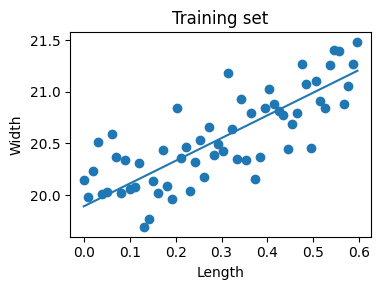

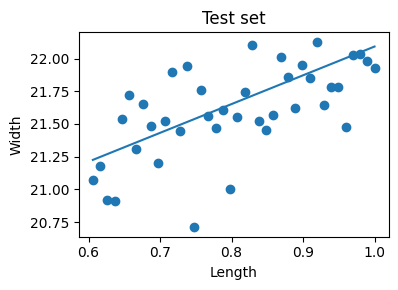

In [72]:
plt.figure(figsize=(4, 3))
plt.title("Training set")

plt.scatter(train_x, train_y)
x = np.array([min(train_x), max(train_x)])
theta = d["theta"]
b = d["b"]
y = theta * x + b
plt.plot(x, y)  
plt.axis("tight")
plt.xlabel("Length")
plt.ylabel("Width");
plt.tight_layout()


plt.figure(figsize=(4, 3))
plt.title("Test set")

plt.scatter(test_x, test_y)
x = np.array([min(test_x), max(test_x)])
theta = d["theta"]
b = d["b"]
y = theta * x + b
plt.plot(x, y)  
plt.axis("tight")
plt.xlabel("Length")
plt.ylabel("Width");
plt.tight_layout()